In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from nltk import FreqDist
from vocab import get_glove
import pickle

%matplotlib inline

In [2]:
# Define data directories
project_dir = '/Users/andrewweitz/_Stanford/year6/cs224n/project'
data_dir    = 'data/'
data_dir    = os.path.join(project_dir, data_dir)

dataset       = 'dev'
answer_path   = os.path.join(data_dir, dataset + '.answer')
context_path  = os.path.join(data_dir, dataset + '.context')
question_path = os.path.join(data_dir, dataset + '.question')
span_path     = os.path.join(data_dir, dataset + '.span')

In [3]:
contexts = []
questions = []
answers = []

context_file, qn_file, ans_file = open(context_path), open(question_path), open(answer_path)
context_line, qn_line, ans_line = context_file.readline(), qn_file.readline(), ans_file.readline() # read the first line
while context_line and qn_line and ans_line: # while you haven't reached the end
    contexts.append(context_line)
    questions.append(qn_line)
    answers.append(ans_line)
    context_line, qn_line, ans_line = context_file.readline(), qn_file.readline(), ans_file.readline() # read the next line

spans = np.genfromtxt(os.path.join(data_dir,span_path)    , dtype='str', delimiter="\n")
spans = np.asarray([np.asarray(str.split(x),int) for x in spans])

In [4]:
# # Read in data as text strings
# answers   = np.genfromtxt(os.path.join(data_dir,answer_fname)  , dtype='str', delimiter="\n")
# contexts  = np.genfromtxt(os.path.join(data_dir,context_fname) , dtype='str', delimiter="\n")
# questions = np.genfromtxt(os.path.join(data_dir,question_fname), dtype='str', delimiter="\n")

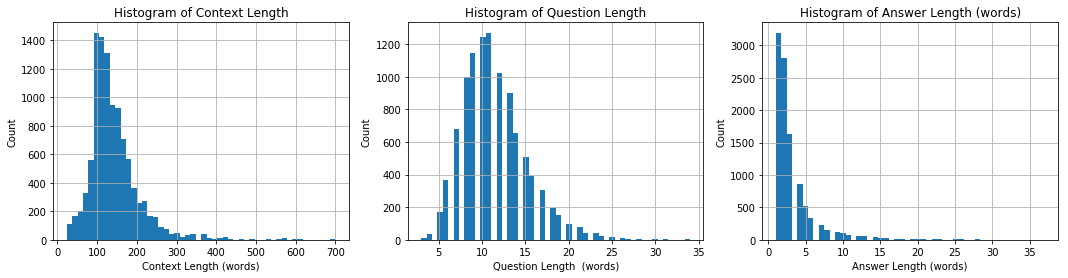

142.12366470984506
11.44076604754114
3.19872966990665


10391

In [5]:
# Make histograms of question/answer/contexts lengths

N = len(contexts)
answer_lengths   = [len(str.split(x)) for x in answers]
context_lengths  = [len(str.split(x)) for x in contexts]
question_lengths = [len(str.split(x)) for x in questions]

plt.figure(figsize=(18, 4))

plt.subplot(1,3,1)
plt.hist(context_lengths,50)
plt.xlabel('Context Length (words)')
plt.title('Histogram of Context Length')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(question_lengths,50)
plt.xlabel('Question Length  (words)')
plt.title('Histogram of Question Length')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(answer_lengths,50)
plt.xlabel('Answer Length (words)')
plt.title('Histogram of Answer Length (words)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

print(np.mean(context_lengths))
print(np.mean(question_lengths))
print(np.mean(answer_lengths))

len(questions)

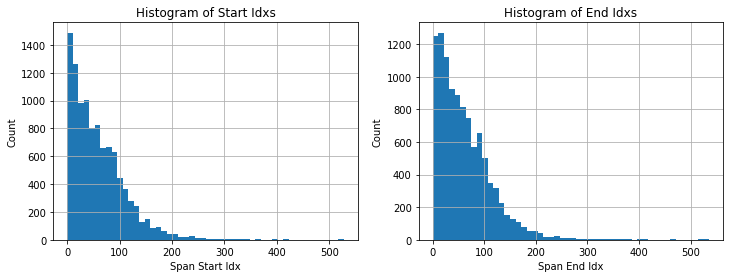

In [6]:
# Make histograms of span indices
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(spans[:,0],50)
plt.xlabel('Span Start Idx')
plt.ylabel('Count')
plt.title('Histogram of Start Idxs')
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(spans[:,1],50)
plt.xlabel('Span End Idx')
plt.title('Histogram of End Idxs')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [7]:
# Test that data has been read-in correctly
context_index = 100
print(questions[context_index])
print(answers[context_index])
print(spans[context_index])
print(str.split(contexts[context_index])[spans[context_index][0]:(spans[context_index][1]+1)])

when was warsaw 's stock exchange brought back to life ?

april 1991

[21 22]
['april', '1991']


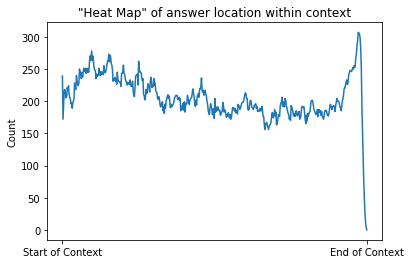

In [8]:
# Where in the context is the answer likely to appear?
numcols = 500
answer_prob = np.zeros((N,numcols))
for cnt, (context_length, span) in enumerate(zip(context_lengths, spans)):
    answer_loc = (numcols*span/float(context_length)).astype(int)
    answer_prob[cnt,answer_loc[0]:(answer_loc[1]+1)] = 1

plt.plot(np.sum(answer_prob,axis=0))
plt.ylabel('Count')
plt.xticks([0, numcols], ('Start of Context', 'End of Context') )
plt.title('"Heat Map" of answer location within context')
plt.show()

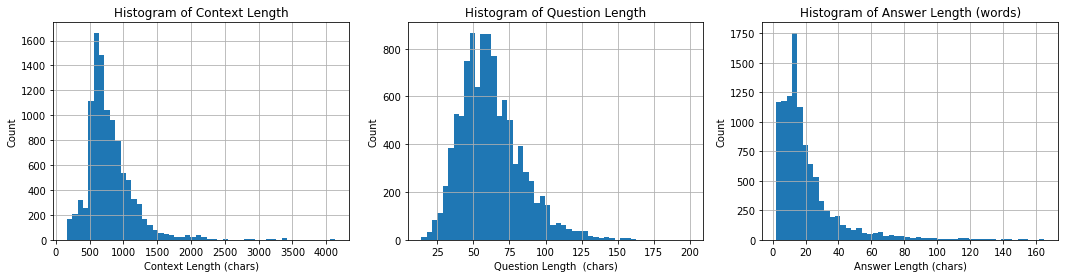

In [9]:
# Make histograms of question/answer/contexts lengths

N = len(contexts)
answer_lengths_chars   = [len(x) for x in answers]
context_lengths_chars  = [len(x) for x in contexts]
question_lengths_chars = [len(x) for x in questions]

plt.figure(figsize=(18, 4))

plt.subplot(1,3,1)
plt.hist(context_lengths_chars,50)
plt.xlabel('Context Length (chars)')
plt.title('Histogram of Context Length')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(question_lengths_chars,50)
plt.xlabel('Question Length  (chars)')
plt.title('Histogram of Question Length')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(answer_lengths_chars,50)
plt.xlabel('Answer Length (chars)')
plt.title('Histogram of Answer Length (words)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [10]:
# most common words
num_trainable = 1000
mcw = [x[0] for x in FreqDist(''.join(questions).replace('\n', ' ').split()).most_common(num_trainable)]

In [11]:
emb_matrix , word2id, id2word = get_glove('../../data/glove.6B.100d.txt',100)

  0%|          | 1910/400000 [00:00<00:20, 19092.55it/s]

Loading GLoVE vectors from file: ../../data/glove.6B.100d.txt


100%|██████████| 400000/400000 [00:11<00:00, 34706.14it/s]


In [12]:
mcids = [word2id[w] for w in mcw]
# pickle.dump( mcids, open( "mcids.p", "wb" ) )

In [13]:
mcids_dict = dict(zip(mcids,range(len(mcids))))
ids2mc_dict = dict(zip(range(len(mcids)),mcids))

In [14]:
id2word[mcids[1]]

'the'

In [15]:
num2print=20
print(mcids[:num2print])
print([id2word[x] for x in mcids[:num2print]])

[190, 2, 104, 5, 8, 6, 16, 121, 17, 9, 40, 199, 11, 12, 63, 7, 3, 44, 34, 111]
['?', 'the', 'what', 'of', 'in', 'to', 'is', 'did', 'was', 'a', 'who', 'how', "'s", 'for', 'when', 'and', ',', 'which', 'are', 'many']


In [16]:
search_idx = 0
cidx = [324,572,319]

search_idx = 1
cidx = [62,3,84]

print(id2word[ids2mc_dict[search_idx]])
print([id2word[ids2mc_dict[x]] for x in cidx])

the
['system', 'of', 'amazon']


In [17]:
search_indices = [2,6,7,8,10,11,16,17,18,19]
print([id2word[ids2mc_dict[x]] for x in search_indices])

['what', 'is', 'did', 'was', 'who', 'how', ',', 'which', 'are', 'many']


In [18]:
# m = [[199,740, 855],[136, 20, 53],[39, 22, 116],[72, 38, 41],[104, 740, 348],\
#      [1233, 20, 509],[108, 129, 36],[14, 22, 54],[35, 41, 32],[79, 308, 98]]

m = [[40, 855, 348],[928, 32, 348],[163, 46, 6727],[1993, 8429, 101],[11077, 389, 350],\
     [104, 102, 348],[965, 7, 379],[113, 121, 60],[30267, 1993, 262],[308, 120, 203]]

In [19]:
for s in m:
    print([id2word[x] for x in s])

['who', 'fact', 'know']
['movement', 'be', 'know']
['work', 'their', 'oxygen']
['bowl', 'amazon', 'u.s.']
['plague', 'france', 'french']
['what', 'so', 'know']
['helped', 'and', 'district']
['where', 'did', 'first']
['tesla', 'bowl', 'does']
['few', 'between', 'several']


In [20]:
for s in m:
    print([id2word[x] in mcw for x in s])

[True, True, False]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, False]
[True, True, True]
[True, False, True]
[True, True, True]
[True, True, True]
[True, False, True]


In [21]:
# get newly learned embeddings for commonQ (1000,100)
# x = np.random.rand(1000,100)
x = pickle.load( open( "common_matrix.p", "rb" ) )

# the 0th row of x corresponds to the ids2mc_dict[0] row of emb_matrix
emb_matrix_new = emb_matrix.copy()
for cnt,row in enumerate(x):
    emb_matrix_new[ids2mc_dict[cnt]] = row
    
pickle.dump(emb_matrix_new, open( "commonQ_GLOVE.p", "wb" ) )

In [43]:
glove_words = set(word2id.keys())

# how many question words are in GloVe
question_words = set(''.join(questions).replace('\n', ' ').split())
print(len(glove_words.intersection(question_words)) / float(len(question_words)) * 100)

# how many context words in in GloVe
cnt = 0
context_words = set(''.join(contexts).replace('\n', ' ').split())
print(len(glove_words.intersection(context_words)) / float(len(context_words)) * 100)

84.9989817738
73.3798716608


In [58]:
# what are the most common ways to begin questions
N = 20
question_starts = [" ".join(q) for q in [q.split()[:2] for q in questions]]
fd = FreqDist(question_starts)
most_common = fd.most_common(N)
least_common = fd.most_common()[-N:]
most_common

[('what is', 949),
 ('what was', 534),
 ('how many', 507),
 ('what did', 373),
 ('when did', 325),
 ('in what', 240),
 ('when was', 238),
 ('what does', 219),
 ('who was', 209),
 ('what type', 191),
 ('what are', 187),
 ('how much', 135),
 ('where did', 123),
 ('what do', 122),
 ('who did', 107),
 ('who is', 97),
 ('where was', 88),
 ('what kind', 88),
 ('how did', 78),
 ('what year', 69)]